In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


In [10]:

api_key = "4ec6d8e1ae81121aede0df10f12e834e"
api_key

'4ec6d8e1ae81121aede0df10f12e834e'

In [11]:
from citipy import citipy

In [12]:
output_data_file = "out_put/cities.csv"
lat_range = (-90,90)
lng_range = (-180,180)
print(api_key)

4ec6d8e1ae81121aede0df10f12e834e


In [13]:
#List for holding lat_lngs and cities
lat_lngs = []
cities = []
#create a set of random lat long combo's
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

#identify nearest city for each lat & lng combo
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
#     if the city is unique append(add to the cities list)
    if city not in cities:
        cities.append(city)
        
len(cities)



609

In [14]:
#generate city list
cities


['albany',
 'iberia',
 'kapaa',
 'bluff',
 'castro',
 'jacqueville',
 'new norfolk',
 'mahebourg',
 'rikitea',
 'solovetskiy',
 'busselton',
 'mataura',
 'hilo',
 'avarua',
 'bathsheba',
 'nome',
 'saskylakh',
 'teseney',
 'limbang',
 'guerrero negro',
 'chuy',
 'ilulissat',
 'mogadishu',
 'hwange',
 'illoqqortoormiut',
 'grand river south east',
 'yellowknife',
 'cape town',
 'punta arenas',
 'broken hill',
 'ushuaia',
 'vaini',
 'taolanaro',
 'zhanaozen',
 'nizhneyansk',
 'mujiayingzi',
 'ponta do sol',
 'ribeira grande',
 'teguise',
 'butaritari',
 'rehoboth',
 'ocampo',
 'atsiki',
 'nikolskoye',
 'santa cruz',
 'terrace bay',
 'pangkalanbuun',
 'geraldton',
 'souillac',
 'iranshahr',
 'nemuro',
 'sentyabrskiy',
 'grindavik',
 'ketchikan',
 'lavrentiya',
 'atuona',
 'malino',
 'jamestown',
 'severo-kurilsk',
 'sao filipe',
 'lima',
 'mackenzie',
 'belaya gora',
 'lorengau',
 'amderma',
 'arraial do cabo',
 'siilinjarvi',
 'vila velha',
 'mogwase',
 'thompson',
 'altus',
 'bengkulu',

In [15]:
#starting URL to pull api call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4ec6d8e1ae81121aede0df10f12e834e"
url



'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4ec6d8e1ae81121aede0df10f12e834e'

In [16]:
url

'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4ec6d8e1ae81121aede0df10f12e834e'

In [17]:
#list of data
city_data = []

#print to logger
print("Beginner Data Retrieval")
print("---------------")
#don't forget spacing ***python forloop has to be inside of forloop until the end

#counters
record_count = 1
set_count = 1

#loop through cities (enumerate = going through cities one by one)
for i, city in enumerate(cities):
    #group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count +=1
        record_count = 0
        
    #create endpoint URL with each city
    city_url = url + "&q=" + city
    
    #log the url, record and set number (where ever you see % pass the array (items) below every time)
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    #add 1 to the record count (what is was plus one)
    record_count += 1
    
    #run an API request for each of the cities
    try:
        #parse the JSON and retrieve 
        city_weather = requests.get(city_url).json()
                 
        
        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
                                
        #if city not found go to next
    except:
        print("City not found, move on to the next...")
        pass
        
#indicate data loading is done
print("-------------------")
print("Data Retrieval Complete")
print("--------------------")

Beginner Data Retrieval
---------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | iberia
Processing Record 3 of Set 1 | kapaa
Processing Record 4 of Set 1 | bluff
Processing Record 5 of Set 1 | castro
Processing Record 6 of Set 1 | jacqueville
Processing Record 7 of Set 1 | new norfolk
Processing Record 8 of Set 1 | mahebourg
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | solovetskiy
City not found, move on to the next...
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | hilo
Processing Record 14 of Set 1 | avarua
Processing Record 15 of Set 1 | bathsheba
Processing Record 16 of Set 1 | nome
Processing Record 17 of Set 1 | saskylakh
Processing Record 18 of Set 1 | teseney
Processing Record 19 of Set 1 | limbang
Processing Record 20 of Set 1 | guerrero negro
Processing Record 21 of Set 1 | chuy
Processing Record 22 of Set 1 | ilulissat
Processing Record 23 of Set 1 | mogadi

Processing Record 32 of Set 4 | broome
Processing Record 33 of Set 4 | shaowu
Processing Record 34 of Set 4 | bogo
Processing Record 35 of Set 4 | la union
Processing Record 36 of Set 4 | hokitika
Processing Record 37 of Set 4 | ventspils
Processing Record 38 of Set 4 | maumere
Processing Record 39 of Set 4 | ithaki
Processing Record 40 of Set 4 | los llanos de aridane
Processing Record 41 of Set 4 | tawkar
City not found, move on to the next...
Processing Record 42 of Set 4 | araguatins
City not found, move on to the next...
Processing Record 43 of Set 4 | louisbourg
City not found, move on to the next...
Processing Record 44 of Set 4 | houma
Processing Record 45 of Set 4 | tiksi
Processing Record 46 of Set 4 | seddon
Processing Record 47 of Set 4 | shibetsu
Processing Record 48 of Set 4 | ust-kamchatsk
City not found, move on to the next...
Processing Record 49 of Set 4 | byron bay
Processing Record 0 of Set 5 | sale
Processing Record 1 of Set 5 | xichang
Processing Record 2 of Set 5

Processing Record 17 of Set 8 | carnarvon
Processing Record 18 of Set 8 | tagusao
Processing Record 19 of Set 8 | seoul
Processing Record 20 of Set 8 | jose de freitas
Processing Record 21 of Set 8 | ilembo
Processing Record 22 of Set 8 | karaul
City not found, move on to the next...
Processing Record 23 of Set 8 | barcelos
Processing Record 24 of Set 8 | kandla
Processing Record 25 of Set 8 | sambava
Processing Record 26 of Set 8 | bambous virieux
Processing Record 27 of Set 8 | amelia
Processing Record 28 of Set 8 | okha
Processing Record 29 of Set 8 | saleaula
City not found, move on to the next...
Processing Record 30 of Set 8 | puerto escondido
Processing Record 31 of Set 8 | iquique
Processing Record 32 of Set 8 | kota
Processing Record 33 of Set 8 | kavieng
Processing Record 34 of Set 8 | road town
Processing Record 35 of Set 8 | maniitsoq
Processing Record 36 of Set 8 | te anau
Processing Record 37 of Set 8 | hofn
Processing Record 38 of Set 8 | rovaniemi
Processing Record 39 o

Processing Record 4 of Set 12 | namibe
Processing Record 5 of Set 12 | otradinskiy
City not found, move on to the next...
Processing Record 6 of Set 12 | tsiroanomandidy
Processing Record 7 of Set 12 | kumluca
Processing Record 8 of Set 12 | kathu
Processing Record 9 of Set 12 | meyungs
City not found, move on to the next...
Processing Record 10 of Set 12 | santa maria
Processing Record 11 of Set 12 | kisangani
Processing Record 12 of Set 12 | tahoua
Processing Record 13 of Set 12 | vangaindrano
Processing Record 14 of Set 12 | temiraul
Processing Record 15 of Set 12 | hay river
Processing Record 16 of Set 12 | nagua
Processing Record 17 of Set 12 | tepetzintla
Processing Record 18 of Set 12 | concepcion del oro
Processing Record 19 of Set 12 | polovinnoye
Processing Record 20 of Set 12 | sept-iles
Processing Record 21 of Set 12 | lanzhou
Processing Record 22 of Set 12 | touros
Processing Record 23 of Set 12 | mbigou
Processing Record 24 of Set 12 | mayo
Processing Record 25 of Set 12 

In [18]:
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.60,-73.97,50.00,61,1,9.17,US,1604551502
1,iberia,29.95,-91.75,62.60,59,1,5.82,US,1604551503
2,kapaa,22.08,-159.32,78.80,88,75,8.05,US,1604551503
3,bluff,-46.60,168.33,50.00,91,100,7.00,NZ,1604551503
4,castro,-24.79,-50.01,50.20,92,96,10.13,BR,1604551503
...,...,...,...,...,...,...,...,...,...
550,porto novo,6.50,2.60,80.60,88,40,6.93,BJ,1604551592
551,humaita,-7.51,-63.02,77.23,78,74,1.52,BR,1604551592
552,bonaventure,48.05,-65.49,30.20,68,85,6.93,CA,1604551593
553,matara,5.95,80.54,86.02,66,17,4.88,LK,1604551593


In [19]:
city_data_df.count()

City          555
Lat           555
Lng           555
Max Temp      555
Humidity      555
Cloudiness    555
Wind Speed    555
Country       555
Date          555
dtype: int64

In [20]:
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.60,-73.97,50.00,61,1,9.17,US,1604551502
1,iberia,29.95,-91.75,62.60,59,1,5.82,US,1604551503
2,kapaa,22.08,-159.32,78.80,88,75,8.05,US,1604551503
3,bluff,-46.60,168.33,50.00,91,100,7.00,NZ,1604551503
4,castro,-24.79,-50.01,50.20,92,96,10.13,BR,1604551503
...,...,...,...,...,...,...,...,...,...
550,porto novo,6.50,2.60,80.60,88,40,6.93,BJ,1604551592
551,humaita,-7.51,-63.02,77.23,78,74,1.52,BR,1604551592
552,bonaventure,48.05,-65.49,30.20,68,85,6.93,CA,1604551593
553,matara,5.95,80.54,86.02,66,17,4.88,LK,1604551593


In [13]:
city_data

[{'City': 'oksbol',
  'Lat': 55.63,
  'Lng': 8.29,
  'Max Temp': 48.99,
  'Humidity': 87,
  'Cloudiness': 0,
  'Wind Speed': 9.17,
  'Country': 'DK',
  'Date': 1604514658},
 {'City': 'chokurdakh',
  'Lat': 70.63,
  'Lng': 147.92,
  'Max Temp': -14.19,
  'Humidity': 84,
  'Cloudiness': 0,
  'Wind Speed': 5.84,
  'Country': 'RU',
  'Date': 1604514658},
 {'City': 'grahamstown',
  'Lat': -33.3,
  'Lng': 26.53,
  'Max Temp': 60.89,
  'Humidity': 93,
  'Cloudiness': 100,
  'Wind Speed': 9.86,
  'Country': 'ZA',
  'Date': 1604514658},
 {'City': 'mount gambier',
  'Lat': -37.83,
  'Lng': 140.77,
  'Max Temp': 46.4,
  'Humidity': 81,
  'Cloudiness': 40,
  'Wind Speed': 8.05,
  'Country': 'AU',
  'Date': 1604514658},
 {'City': 'asau',
  'Lat': 46.43,
  'Lng': 26.4,
  'Max Temp': 36,
  'Humidity': 97,
  'Cloudiness': 0,
  'Wind Speed': 1.39,
  'Country': 'RO',
  'Date': 1604514658},
 {'City': 'bilibino',
  'Lat': 68.05,
  'Lng': 166.44,
  'Max Temp': 4.62,
  'Humidity': 91,
  'Cloudiness': 100,
 

In [21]:
#look at data before plotting
city_data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,5.550000e+02
mean,18.262234,20.484667,58.621658,70.650450,50.927928,8.059495,1.604552e+09
std,33.505763,90.661646,22.602091,21.872629,40.454260,6.198384,5.756054e+01
min,-54.800000,-175.200000,-20.200000,14.000000,0.000000,0.250000,1.604551e+09
25%,-9.840000,-56.120000,46.695000,57.000000,1.500000,3.360000,1.604552e+09
50%,21.170000,24.410000,62.040000,77.000000,55.000000,6.930000,1.604552e+09
75%,47.200000,99.690000,76.145000,88.000000,92.000000,10.290000,1.604552e+09
max,78.220000,179.320000,100.400000,100.000000,100.000000,50.550000,1.604552e+09


# Scatter Plot latitude(x) vs. Temperature(y)
#Scatter plot linear regression vs r

In [22]:
#export df to a csv file = cities
city_data_df.to_csv(output_data_file, index_label="city id")


In [23]:
#visiting team vs home team = x vs y standard practice
#scatter plot - latitude vs temperature
#scatter plot w/linear regression and r - value

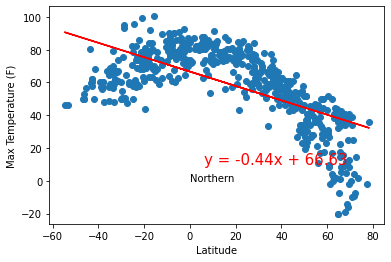

In [24]:
# Add the linear regression equation and line to plot()
#add plot annotate to remember how to divide visual between north and south hemispheres
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
#standard linear regression template following lines(round cuts decimal to two spaces):
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
#annotate
plt.annotate("Northern",(0,0),fontsize=10,color="black")
plt.show()



## Analysis of Latitude vs Max Temperature:
#### There appears to be a relationship between latitude and max temperature. The temperatures decrease as you move away from the equator.


The r-squared is: 0.422882700362449


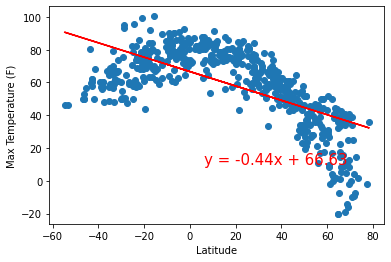

In [26]:
# Print out the r-squared value along with the plot.(r=how good is y at explaining x)
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

## Analysis of Latitude vs Humidity:
#### There appears to be a relationship between latitude and humidity. There is a clustering of more humidity as you farther north of the equator.

The r-squared is: 0.02786277431800093


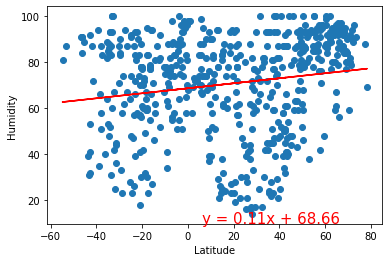

In [27]:
#y value is Humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

## Analysis of Latitude vs Cloudiness:
#### There appears to be no observed relationship between latitude and cloudiness. 

The r-squared is: 0.010870118080668558


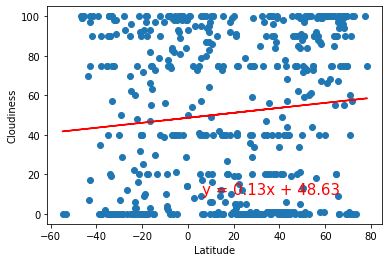

In [28]:
#y value is Cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

## Analysis of Latitude vs Wind Speed:
#### There appears to be a weak relationship between latitude and wind speed. There's an outlier of higher winds in the northern extreme latitudes.

The r-squared is: 0.023530465721218405


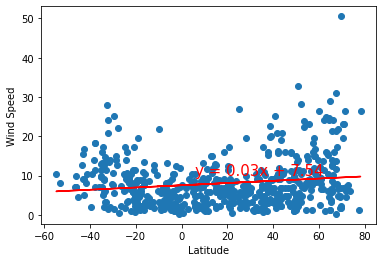

In [29]:
#y value is Wind Speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

# Identify northern and southern hemispheres

In [30]:
#visualize data to determine which column to pull from

In [31]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.60,-73.97,50.0,61,1,9.17,US,1604551502
1,iberia,29.95,-91.75,62.6,59,1,5.82,US,1604551503
2,kapaa,22.08,-159.32,78.8,88,75,8.05,US,1604551503
3,bluff,-46.60,168.33,50.0,91,100,7.00,NZ,1604551503
4,castro,-24.79,-50.01,50.2,92,96,10.13,BR,1604551503


In [32]:
#filter data to set parameters to pull northern hemi data 
northern_hemisphere = city_data_df.loc[(city_data_df["Lat"] > 0)]
northern_hemisphere

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.60,-73.97,50.00,61,1,9.17,US,1604551502
1,iberia,29.95,-91.75,62.60,59,1,5.82,US,1604551503
2,kapaa,22.08,-159.32,78.80,88,75,8.05,US,1604551503
5,jacqueville,5.21,-4.41,80.60,88,20,5.82,CI,1604551503
11,hilo,19.73,-155.09,78.80,74,1,6.87,US,1604551505
...,...,...,...,...,...,...,...,...,...
547,west plains,36.73,-91.85,60.80,51,1,6.93,US,1604551592
548,chara,56.91,118.26,16.95,88,88,1.16,RU,1604551592
550,porto novo,6.50,2.60,80.60,88,40,6.93,BJ,1604551592
552,bonaventure,48.05,-65.49,30.20,68,85,6.93,CA,1604551593


In [33]:
#filter data to pull southern hemi data
southern_hemisphere = city_data_df.loc[(city_data_df["Lat"] < 0)]
southern_hemisphere

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,bluff,-46.60,168.33,50.00,91,100,7.00,NZ,1604551503
4,castro,-24.79,-50.01,50.20,92,96,10.13,BR,1604551503
6,new norfolk,-42.78,147.06,62.01,53,97,5.01,AU,1604551504
7,mahebourg,-20.41,57.70,71.60,78,40,3.36,MU,1604551504
8,rikitea,-23.12,-134.97,73.99,66,3,9.17,PF,1604551504
...,...,...,...,...,...,...,...,...,...
534,nhulunbuy,-12.23,136.77,89.60,52,40,12.75,AU,1604551590
537,biloela,-24.42,150.50,95.59,23,0,13.91,AU,1604551590
549,sao sebastiao do cai,-29.59,-51.38,55.00,83,7,1.52,BR,1604551592
551,humaita,-7.51,-63.02,77.23,78,74,1.52,BR,1604551592


In [34]:
#when you break something into two it should be mutually exclusive so no need to do = 0

The r-squared is: 0.7508452891407702


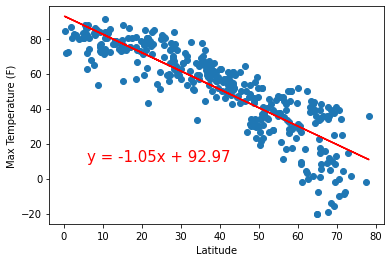

In [35]:
#compare northern hemisphere lat vs max temp
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.3717136572458468


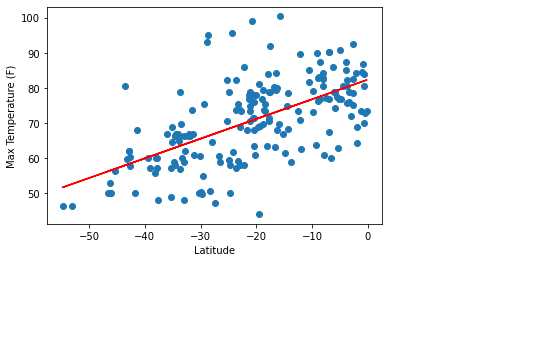

In [36]:
#compare southern hemisphere lat vs max temp
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

#### There appears to be a relationship between temperature and latitude in both hemispheres. However, the correlation is stronger in the northern hemisphere(0.73) versus the southern hemisphere (0.53). The farther you move away from the equator the lower the temperature. 

The r-squared is: 0.11413172897998501


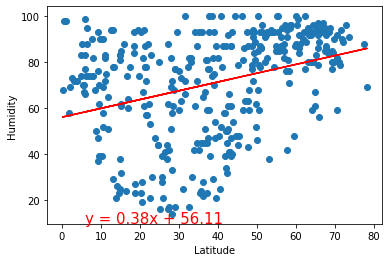

In [37]:
#compare northern hemisphere lat vs humidity
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.014625626728605744


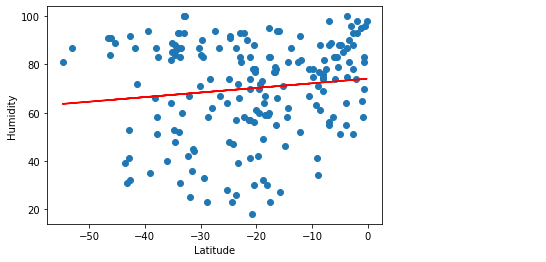

In [38]:
#compare southern hemisphere lat vs humidity
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

#### There appears to be a almost no observable Pearsons's correlation (less than .01) between humidity and latitude when you compare them by hemispheres.  

The r-squared is: 0.07631366190484787


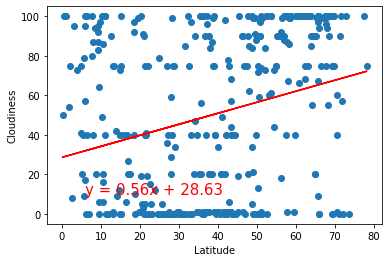

In [39]:
#compare northern hemisphere lat vs cloudiness
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.015219323964665308


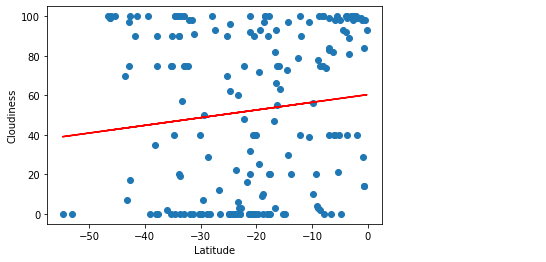

In [40]:
#compare southern hemisphere lat vs cloudiness
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

#### There appears to be a almost no observable Pearsons's correlation (less than .01) between cloudiness and latitude when you compare them by hemispheres.

The r-squared is: 0.11831510361815638


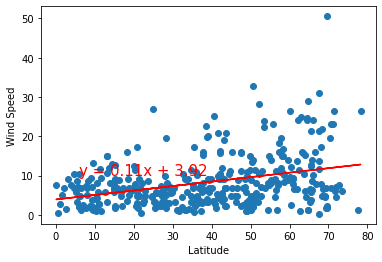

In [41]:
#compare northern hemisphere lat vs Wind Speed
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.14302277050199136


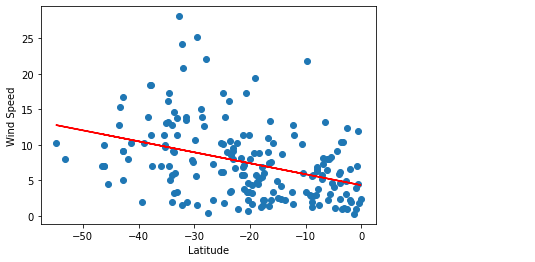

In [42]:
#compare southern hemisphere lat vs humidity
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

#### The correlation bween wind speed and latitude once separated by hemisphere decreases when filtered out by  hemispheres.